# Tesis Parte III

# DBSCAN

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# LEER DATOS REFINADOS ARCHIVO CSV

In [2]:
#DBSCAN_initial = pd.read_csv("4-train_norm_split.csv")
DBSCAN_initial = pd.read_csv("2-medicamentos-norm-fix.csv")

In [3]:
#importación de librerías adicionales
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [4]:
DBSCAN_initial.head()

,Column1,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,...,1,0,0,0,0,0,0,0,1,0
3,3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#drop columna Unnnamed:0 

DBSCAN_norm = DBSCAN_initial.drop(['Column1'], axis = 1)

In [6]:
DBSCAN_norm.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,0,1,0,0


# Ver los datos para DBSCAN ya normalizados

In [7]:
DBSCAN_norm.describe()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
count,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,...,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000
mean,0.522890,0.655592,0.152957,0.122200,0.235069,0.369266,0.421740,0.228736,0.243726,0.019782,...,0.039791,0.065868,0.060267,0.034962,0.196446,0.156268,0.107978,0.447556,0.332046,0.112420
std,0.499524,0.180586,0.208202,0.209731,0.202814,0.251508,0.167294,0.292223,0.127890,0.066190,...,0.195488,0.248076,0.238003,0.183702,0.397348,0.363144,0.310382,0.497290,0.470993,0.315913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.153846,0.330357,0.000000,0.150685,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.625000,0.000000,0.000000,0.285714,0.307692,0.428571,0.166667,0.219178,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.750000,0.285714,0.185185,0.285714,0.538462,0.535714,0.333333,0.301370,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataframe = DBSCAN_norm
#dataframe = DBSCAN_data

In [9]:
#DBSCAN_data.count()

DBSCAN_norm.count()

gender                      5177
age                         5177
admission_type_id           5177
discharge_disposition_id    5177
admission_source_id         5177
time_in_hospital            5177
num_lab_procedures          5177
num_procedures              5177
num_medications             5177
number_outpatient           5177
number_emergency            5177
number_inpatient            5177
number_diagnoses            5177
max_glu_serum               5177
A1Cresult                   5177
metformin                   5177
repaglinide                 5177
nateglinide                 5177
glimepiride                 5177
glipizide                   5177
glyburide                   5177
pioglitazone                5177
rosiglitazone               5177
glyburide-metformin         5177
readmitted                  5177
Visits                      5177
AfricanAmerican             5177
Asian                       5177
Caucasian                   5177
Hispanic                    5177
Other     

In [10]:
#dataTotal = data
#data = train
#
#dataTotal = DBSCAN_norm
data = DBSCAN_norm
#data = train


# PCA para la reducción de la dimensionalidad


El análisis de componentes principales es un algoritmo de aprendizaje no supervisado, que reduce el número de características manteniendo la mayor cantidad de información posible. También se utiliza como técnica de preprocesamiento, como en este caso. Al reducir el número de dimensiones al número de dos, podemos trazar los clusters que encontramos. Los componentes principales son los que explican la mayor parte de la varianza de los datos.


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

In [12]:
X_train = pca.fit_transform(data)
#X_train = data

# DBSCAN

se aplica el método de clustering DBSCAN.

Librerías

Las librerías utilizadas en este ejemplo son:


In [13]:
data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data.count()

gender                      5177
age                         5177
admission_type_id           5177
discharge_disposition_id    5177
admission_source_id         5177
time_in_hospital            5177
num_lab_procedures          5177
num_procedures              5177
num_medications             5177
number_outpatient           5177
number_emergency            5177
number_inpatient            5177
number_diagnoses            5177
max_glu_serum               5177
A1Cresult                   5177
metformin                   5177
repaglinide                 5177
nateglinide                 5177
glimepiride                 5177
glipizide                   5177
glyburide                   5177
pioglitazone                5177
rosiglitazone               5177
glyburide-metformin         5177
readmitted                  5177
Visits                      5177
AfricanAmerican             5177
Asian                       5177
Caucasian                   5177
Hispanic                    5177
Other     

In [15]:


# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples 

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [16]:

X = data.to_numpy()

#New Changes
#X_scaled = scale(X_train)
X_scaled = X_train



In [17]:

# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
                    eps          = 0.3,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

#modelo_dbscan.fit(X=X_scaled)
###modelo_dbscan.fit(X=X_scaled)
modelo_dbscan.fit(X_train)

#NEW

#labels = modelo_dbscan.labels_ db
labels = modelo_dbscan.labels_

#label = modelo_dbscan.predict(X_scaled)

#print('Estimated Labels: %d' % labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


print('====================================' )
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, labels))


Estimated number of clusters: 200
Estimated number of noise points: 346
Silhouette Coefficient: 0.612


In [18]:
from sklearn.impute import SimpleImputer


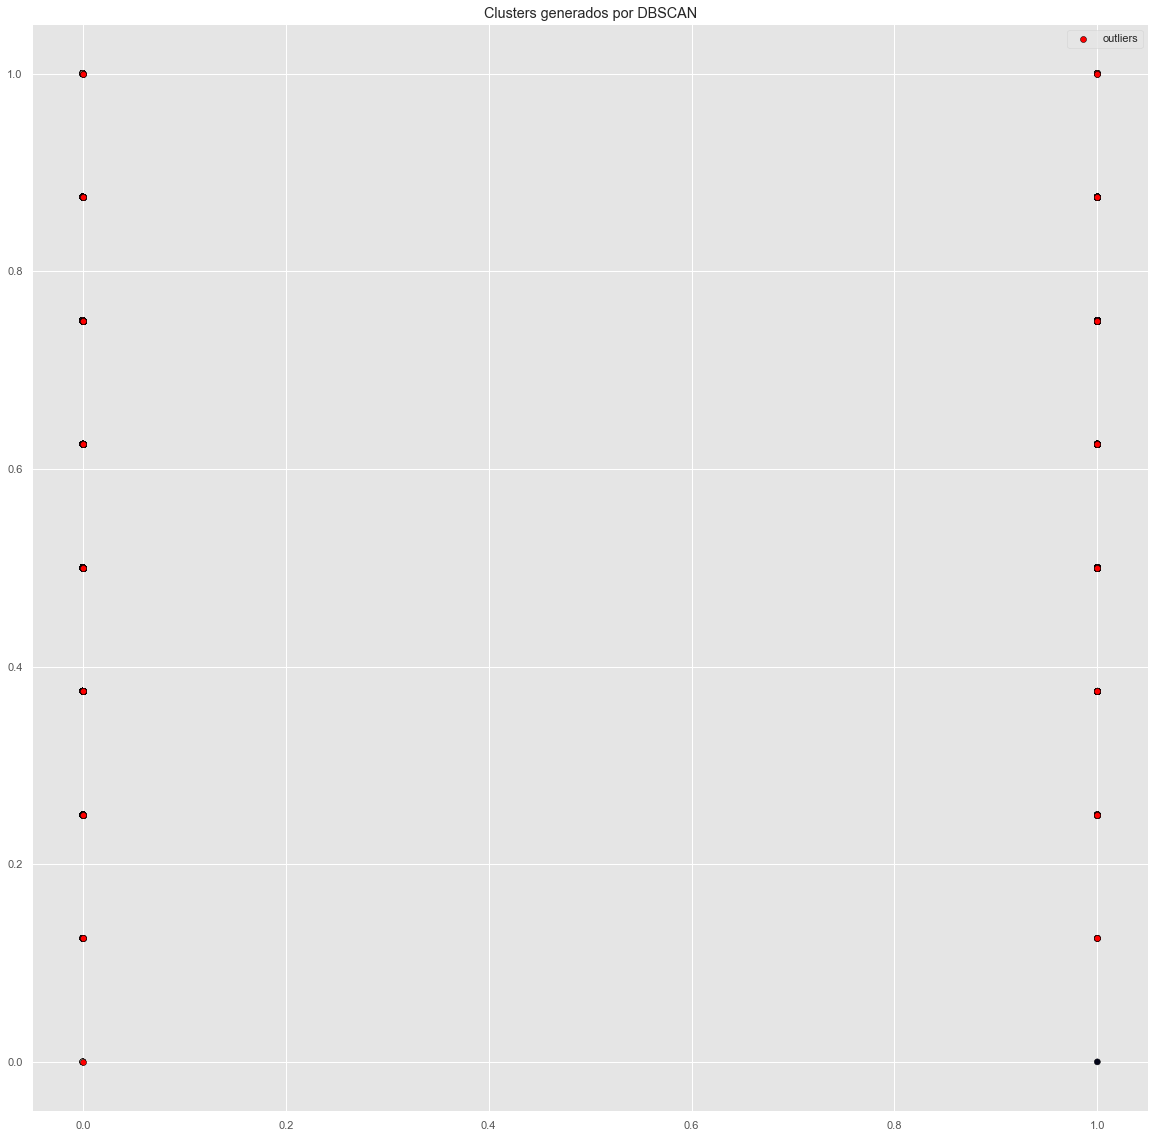

In [19]:

# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

ax.scatter(
   # x = X.iloc[:, 0].values,
   # y = X.iloc[:, 1].values, 
   # x = X[:, -40],
   # y = X[:, 40], 
    x = X[:, -1],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    #x = X.iloc[labels == -1, 0],
    #y = X.iloc[labels == -1, 1], 
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusters generados por DBSCAN');

In [20]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 200
Número de outliers encontrados: 346
